In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from realisation import FieldRealisation
N = 2048
scale = 2000

# Initialise field realisation wrapper
fr = FieldRealisation(N, scale)

# Generate the scale invariant curvature perturbations with default inflation parameters (As=2.1e-9, kp=0.05, ns=0.96)
fr.buildSI()  
              

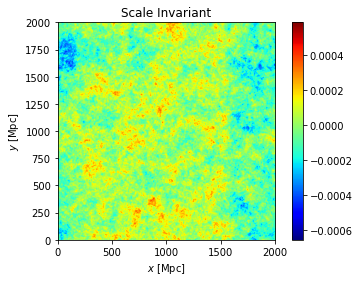

In [3]:
fr.siField.drawField("Scale Invariant")

In [4]:
from powerspectrum import CalculatePS

# calculate the power spectrum of the scale invariant field
cps = CalculatePS(fr.siField, bins=100)

# Extract the input parameters of the scale invrariant power spectrum from the field
print(f"Variance = {cps.As:.4e} \u00B1 {cps.paramErrors[0]:.1e}")
print(f"Pivot scale = {cps.kp:.4f}")
print(f"Scalar spectral index = {cps.ns:.4e} \u00B1 {cps.paramErrors[1]:.1e}")

Variance = 2.1009e-09 ± 7.9e-12
Pivot scale = 0.0500
Scalar spectral index = 9.5963e-01 ± 1.0e-03


C:\Users\User\PycharmProjects\InitialConditions\InitialConditions\cmbEvolution\powerspectrum.py:181: RuntimeWarning: divide by zero encountered in power
  return a * (k / self.kp)**b


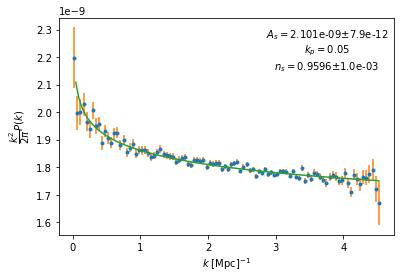

In [5]:
cps.drawPS(siFit=True)

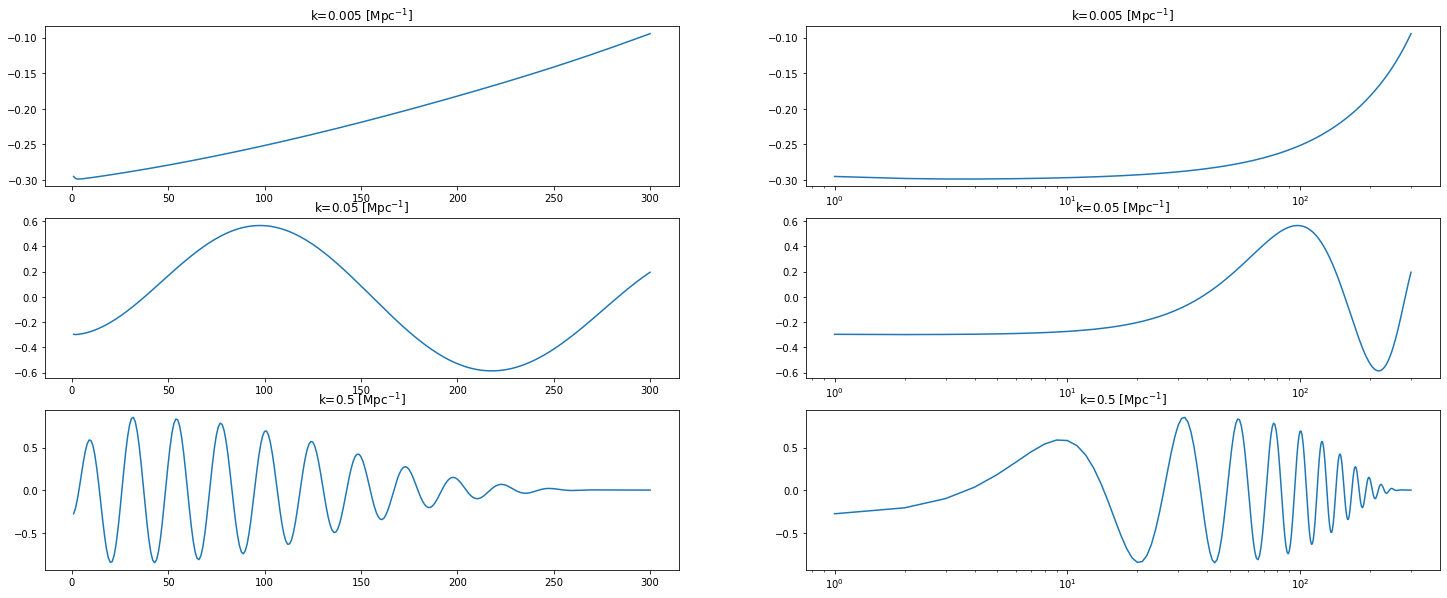

In [6]:
from transfers import TransferFuncs

plt.rcParams["figure.figsize"] = (25,10)

# Plot CAMB transfer functions at k = 0.005, 0.05, 0.5

etas = np.linspace(1, 300, 300)
ks = [0.005, 0.05, 0.5]
tfs = TransferFuncs(ks, etas).tfs
for iii, k in enumerate(ks):
    
    plt.subplot(len(ks), 2, (iii+1)*2 - 1)
    plt.plot(etas, tfs[iii, :, 0])
    plt.title(f"k={k} [Mpc$^{{-1}}$]")
    
    plt.subplot(len(ks), 2, (iii+1)*2)
    plt.semilogx(etas, tfs[iii, :, 0])
    plt.title(f"k={k} [Mpc$^{{-1}}$]")


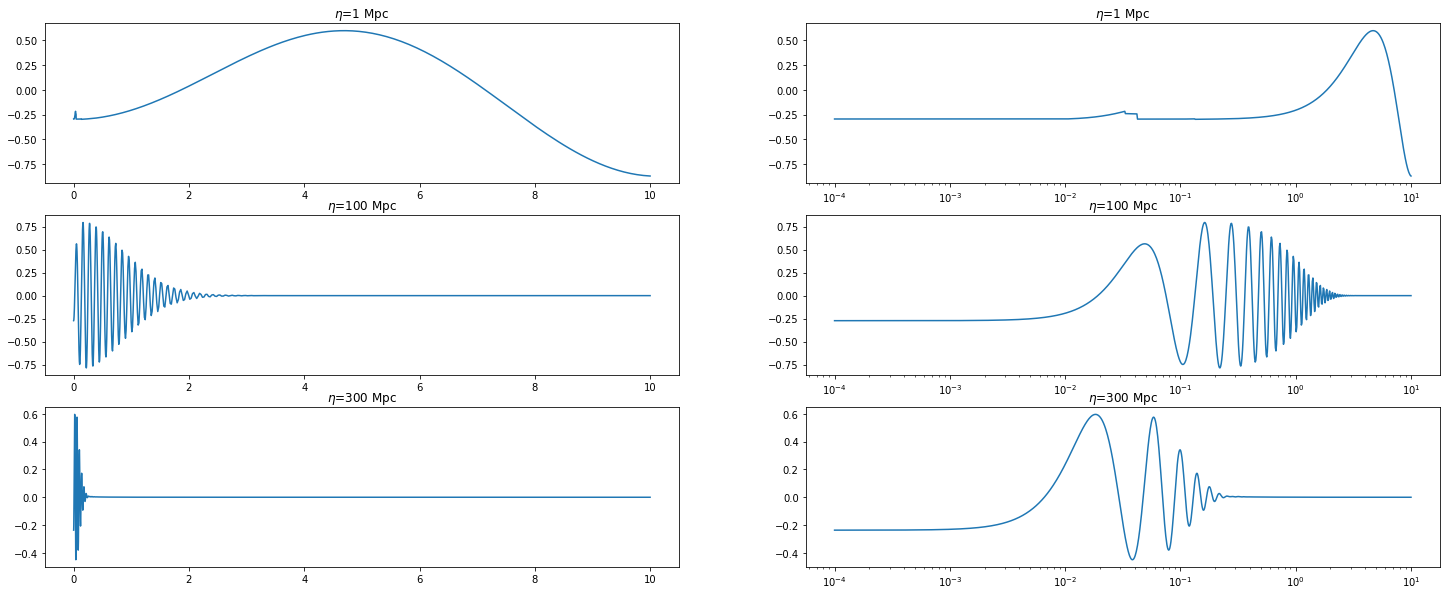

In [7]:
# Plot CAMB transfer functions at eta = 1, 100, 300

etas = [1, 100, 300]
ks = np.logspace(-4, 1, 1000)
tfs = TransferFuncs(ks, etas).tfs
for iii, eta in enumerate(etas):
    
    plt.subplot(len(etas), 2, (iii+1)*2 - 1)
    plt.plot(ks, tfs[:, iii, 0])
    plt.title(f"$\eta$={eta} Mpc")
    
    plt.subplot(len(etas), 2, (iii+1)*2)
    plt.semilogx(ks, tfs[:, iii, 0])
    plt.title(f"$\eta$={eta} Mpc")

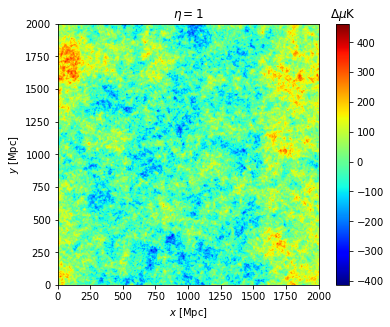

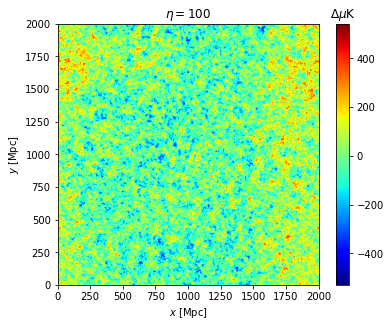

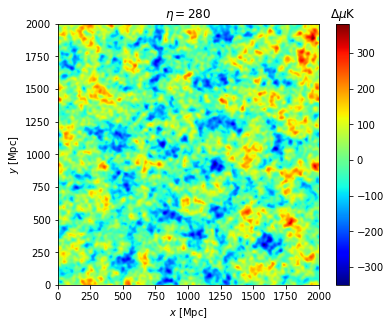

In [8]:
plt.rcParams["figure.figsize"] = (6.4,4.8)

# Calculate and show field of the monopole source at eta = 1, 100, 280

etas = [1, 100, 280]
for eta in etas:
    fr.calcField(eta)
    fr.realField.drawField(f"$\eta = ${eta}", units=True)

C:\Users\User\PycharmProjects\InitialConditions\InitialConditions\cmbEvolution\powerspectrum.py:178: RuntimeWarning: divide by zero encountered in power
  return a * (k / (self.kp*self._distToLastScatter))**b * self._microKelvinSqr


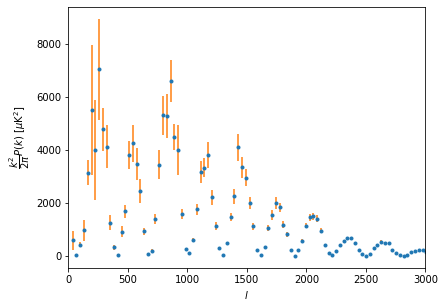

In [9]:
from powerspectrum import CalculatePS

# Calculate power spectrum for the monopole field at given eta

fr.calcField(eta=280)
cps = CalculatePS(fr.realField, bins=2000)

cps.drawPS(units=True)    
plt.xlim(0,3000)
plt.show()

In [10]:
from IPython.display import HTML

# Output from videobuilder.py of monopole evolution up to recombination 
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="videos/monopole_video_1024_1000.mp4" type="video/mp4">
</video></div>""")